In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [4]:
data = pd.read_csv('train_data.csv')
# Display the first few rows of the dataset
print(data.head())

   id home_team_abbr away_team_abbr        date is_night_game  home_team_win  \
0   0            KFH            KJP  2021-05-16         False           True   
1   1            VJV            HXK  2019-05-04          True          False   
2   2            VJV            JEM  2019-06-10          True           True   
3   3            BPH            FBW  2018-06-26          True           True   
4   4            RLJ            DPS  2016-07-05          True          False   

  home_pitcher away_pitcher  home_team_rest  away_team_rest  ...  \
0    juradar01    carraca01             1.0             1.0  ...   
1    ramirer02    rodrich01             2.0             NaN  ...   
2    jarvibr01    tropeni01             1.0             1.0  ...   
3     diazyi01    johnsji04             1.0             1.0  ...   
4    willibr02    armstsh01             1.0             1.0  ...   

   away_pitcher_H_batters_faced_skew  away_pitcher_BB_batters_faced_mean  \
0                           1.1333

### Display all datatype

In [13]:
data.dtypes

id                                    int64
home_team_abbr                       object
away_team_abbr                       object
date                         datetime64[ns]
is_night_game                        object
                                  ...      
away_pitcher_wpa_def_mean           float64
away_pitcher_wpa_def_std            float64
away_pitcher_wpa_def_skew           float64
year                                  int32
month                                 int32
Length: 169, dtype: object

## Convert Datetime to proper datetime object

In [7]:
from datetime import datetime

# Convert string to date object
data['date'] = pd.to_datetime(data['date'])

# Print the date object
data['date']

0       2021-05-16
1       2019-05-04
2       2019-06-10
3       2018-06-26
4       2016-07-05
           ...    
11062   2016-07-08
11063   2023-04-19
11064   2022-05-27
11065   2021-05-19
11066   2023-05-22
Name: date, Length: 11067, dtype: datetime64[ns]

## Checkout home_team_win parameters

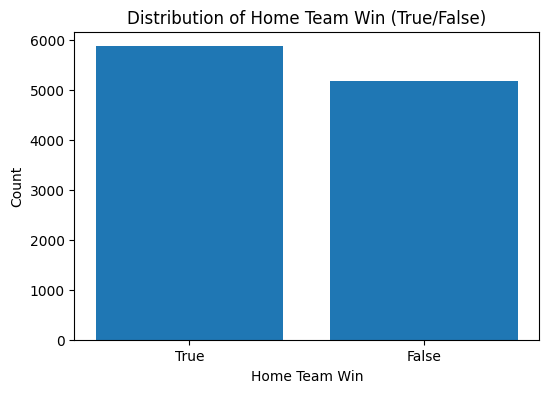

Home Team Win: 5877, Home Team Lose: 5190


In [8]:
# Count occurrences of True and False
counts = data["home_team_win"].value_counts()

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel("Home Team Win")
plt.ylabel("Count")
plt.title("Distribution of Home Team Win (True/False)")
plt.show()

win = data["home_team_win"].value_counts()[True]
lose = data["home_team_win"].value_counts()[False]

print(f"Home Team Win: {win}, Home Team Lose: {lose}")

## Data Processing: Win-loss by Years

In [9]:
# Convert 'date' to year
data['year'] = data['date'].dt.year

# Aggregate win-loss counts per year
win_loss_by_year = data.groupby(['year', 'home_team_win']).size().unstack(fill_value=0)
win_loss_by_year.columns = ['Loss', 'Win']  # Rename columns for clarity
win_loss_by_year['Win_Percentage'] = (win_loss_by_year['Win'] / (win_loss_by_year['Win'] + win_loss_by_year['Loss'])) * 100
win_loss_by_year['Loss_Percentage'] = (win_loss_by_year['Loss'] / (win_loss_by_year['Win'] + win_loss_by_year['Loss'])) * 100

# Display the resulting DataFrame
win_loss_by_year.reset_index(inplace=True)
win_loss_by_year



,year,Loss,Win,Win_Percentage,Loss_Percentage
0,2016,732,834,53.256705,46.743295
1,2017,719,855,54.320203,45.679797
2,2018,767,842,52.330640,47.669360
3,2019,769,852,52.560148,47.439852
4,2021,705,864,55.066922,44.933078
5,2022,735,796,51.992162,48.007838
6,2023,763,834,52.222918,47.777082


### Viewing win-loss by Year

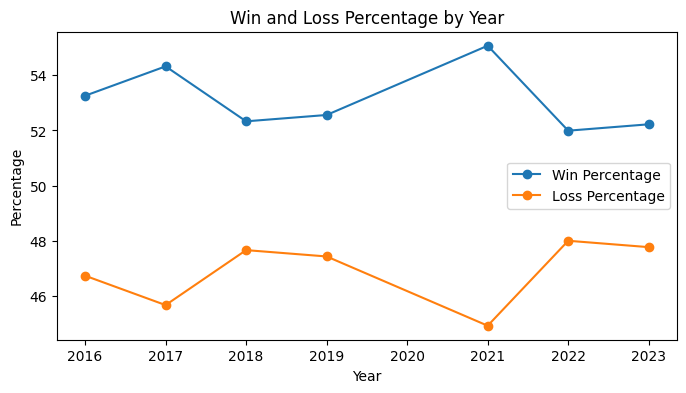

In [10]:
# Plotting win and loss percentages as overlapping sparklines
plt.figure(figsize=(8, 4))
plt.plot(win_loss_by_year['year'], win_loss_by_year['Win_Percentage'], marker='o', label="Win Percentage")
plt.plot(win_loss_by_year['year'], win_loss_by_year['Loss_Percentage'], marker='o', label="Loss Percentage")

# Adding labels and title
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Win and Loss Percentage by Year")
plt.legend(loc="best")



### Viewing win-loss by months


In [11]:
# Convert 'date' to year
data['month'] = data['date'].dt.month

# Aggregate win-loss counts per year
win_loss_by_month = data.groupby(['month', 'home_team_win']).size().unstack(fill_value=0)
win_loss_by_month.columns = ['Loss', 'Win']  # Rename columns for clarity
win_loss_by_month['Win_Percentage'] = (win_loss_by_month['Win'] / (win_loss_by_month['Win'] + win_loss_by_month['Loss'])) * 100
win_loss_by_month['Loss_Percentage'] = (win_loss_by_month['Loss'] / (win_loss_by_month['Win'] + win_loss_by_month['Loss'])) * 100

# Display the resulting DataFrame
win_loss_by_month.reset_index(inplace=True)
win_loss_by_month


,month,Loss,Win,Win_Percentage,Loss_Percentage
0,3,54,58,51.785714,48.214286
1,4,1255,1337,51.581790,48.418210
2,5,1378,1549,52.921080,47.078920
3,6,1299,1513,53.805121,46.194879
4,7,1204,1420,54.115854,45.884146


In [24]:
teams = data['home_team_abbr'].unique()

# Create a dictionary to store win-loss counts for each team
team_win_loss = {}
for team in teams:
  # For home wins
  home_wins = data.loc[data['home_team_abbr'] == team, 'home_team_win'].value_counts()

  # For away wins
  away_wins = data.loc[(data['away_team_abbr'] == team) & (data['home_team_win'] == False)].value_counts()
  
  team_win_loss[team] = home_wins.get(True, 0) + away_wins.get(True, 0)

team_win_loss

{'KFH': np.int64(212),
 'VJV': np.int64(192),
 'BPH': np.int64(194),
 'RLJ': np.int64(219),
 'GUT': np.int64(180),
 'VQC': np.int64(181),
 'PDF': np.int64(197),
 'QPO': np.int64(204),
 'UPV': np.int64(235),
 'MOO': np.int64(208),
 'RKN': np.int64(206),
 'GKO': np.int64(198),
 'XFB': np.int64(178),
 'HAN': np.int64(180),
 'RAV': np.int64(208),
 'FBW': np.int64(202),
 'DPS': np.int64(192),
 'MZG': np.int64(197),
 'QDH': np.int64(179),
 'JBM': np.int64(166),
 'ZQF': np.int64(186),
 'YHA': np.int64(189),
 'STC': np.int64(183),
 'JEM': np.int64(246),
 'SAJ': np.int64(192),
 'PJT': np.int64(180),
 'KJP': np.int64(193),
 'GLO': np.int64(171),
 'HXK': np.int64(228),
 'ECN': np.int64(181)}